# Donwload Stocks Data from Yahoo Finance

In [1]:
"""
    import libs for download stock data
"""
import yfinance as yf

def download_stock_data(tickers, start_date, end_date):
    """
        download stock data
    """
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data    

# define the asset and range 
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2020-01-01'
end_date = '2024-02-01'

# download the data
data = download_stock_data(tickers, start_date, end_date)
print(data.head())


[*********************100%%**********************]  4 of 4 completed
                 AAPL       AMZN       GOOG        MSFT
Date                                                   
2020-01-02  73.059425  94.900497  68.368500  154.493774
2020-01-03  72.349136  93.748497  68.032997  152.570114
2020-01-06  72.925613  95.143997  69.710503  152.964462
2020-01-07  72.582664  95.343002  69.667000  151.569778
2020-01-08  73.750237  94.598503  70.216003  153.984039


# Calculate Return & Volatility of Stocks

In [9]:
"""
    Function to calculate daily returns of the stock
"""
def calculate_daily_returns(data):
    """
        calculate daily returns 
        ( Percentage change between the current and a prior element )
    """
    daily_returns = data.pct_change().dropna()
    return daily_returns

In [10]:
"""
    Function to calculate Volatility of the stock 
    ( Standard Deviation of the daily returns )
"""
def calculate_volatility(data):
    """
        calculate volatility
    """
    volatility = data.std()
    return volatility

In [11]:
"""
    Calculate the daily returns & volatility
"""
daily_returns = calculate_daily_returns(data)
volatility = calculate_volatility(daily_returns)    

print("Daily Returns")
print(daily_returns.head())
print("Volatility")
print(volatility)

Daily Returns
                AAPL      AMZN      GOOG      MSFT
Date                                              
2020-01-03 -0.009722 -0.012139 -0.004907 -0.012451
2020-01-06  0.007968  0.014886  0.024657  0.002585
2020-01-07 -0.004703  0.002092 -0.000624 -0.009118
2020-01-08  0.016086 -0.007809  0.007880  0.015928
2020-01-09  0.021241  0.004799  0.011044  0.012493
Volatility
AAPL    0.021040
AMZN    0.023577
GOOG    0.021054
MSFT    0.020392
dtype: float64


# Computing the Efficient Frontier

In [12]:
import numpy as np
import pandas as pd

def compute_efficient_frontier(returns, num_portfolios=10000):
    """
        Compute the efficient frontier of set of stocks

        Parameters:
            returns (DataFrame): The returns of the stocks
            num_portfolios (int): Number of portfolios to simulate
        
        Returns:
            Tuple: (List of returns, List of volatilities, List of weights)
    """
    
    # calculate covariance matrix
    cov = returns.cov()

    num_assets = len(returns.columns)

    efficient_frontiers = []

    for _ in range(num_portfolios):
        # generate random weights
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        # calculate expected return
        portfolio_return = np.dot(weights, returns.mean()) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)

        efficient_frontiers.append((portfolio_return, portfolio_volatility, weights))
    
    efficient_frontiers = pd.DataFrame(efficient_frontiers, columns=['Return', 'Volatility', 'Weights'])

    return efficient_frontiers
    
# compute efficient frontier
efficient_frontiers = compute_efficient_frontier(daily_returns)
print("Efficient Frontiers")
print(efficient_frontiers.head())

Efficient Frontiers
     Return  Volatility                                            Weights
0  0.241013    0.303407  [0.1580463049001024, 0.3177407780435712, 0.271...
1  0.257292    0.301829  [0.3889501135346056, 0.22940171453487995, 0.10...
2  0.246071    0.301582  [0.3408077944860981, 0.27587314844943395, 0.24...
3  0.247428    0.303742  [0.11453983682464858, 0.29240362247355317, 0.1...
4  0.249483    0.307714  [0.11492069808854954, 0.3395635101143999, 0.05...


# Plot the Efficient Frontier

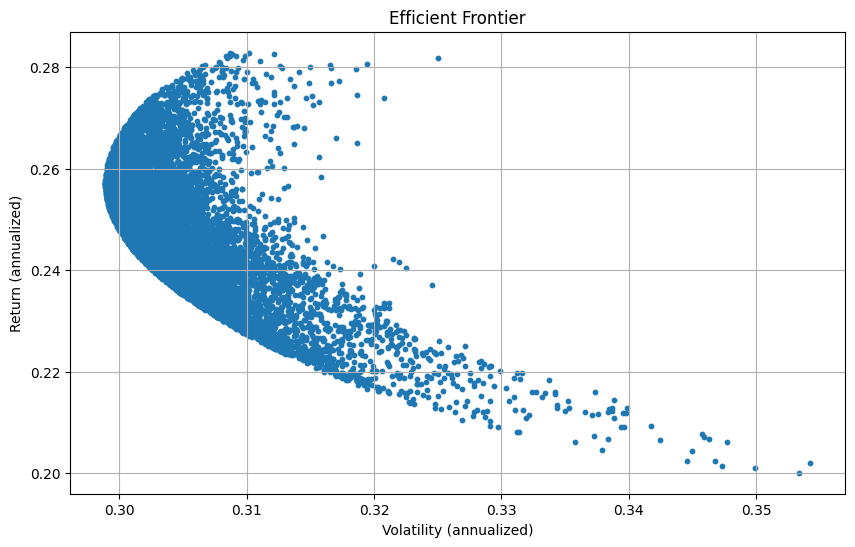

In [14]:
"""
    Function to plot the efficient frontier
"""

import matplotlib.pyplot as plt

# Graficar los datos de la Frontera Eficiente
plt.figure(figsize=(10, 6))
plt.scatter(efficient_frontiers['Volatility'], efficient_frontiers['Return'], marker='o', s=10, label='Portfolios')
plt.xlabel('Volatility (annualized)')
plt.ylabel('Return (annualized)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()